In [1]:
import numpy as np
from torch.utils.data import Dataset

In [2]:
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

In [3]:
from dataset import DatasetConst, DatasetRandomWalk

## Spectrogram plotting function

In [4]:
def plot_spectrogram(signal, sampling_frequency, down_sampling=1, title=None):
    
    frequencies, times_, Sxx = spectrogram(signal[::down_sampling], 
                                           sampling_frequency // down_sampling,  
                                           nfft=10000)
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    cax = ax.pcolormesh(times_, frequencies, 10 * np.log10(Sxx), shading='gouraud')
    fig.colorbar(cax, label='Magnitude (dB)')
    
    fmax = frequencies[Sxx.argmax(axis=0)]
    ax.plot(times_, fmax, linewidth=.5, alpha=.5)
    
    ax.set_ylabel('Frequency [Hz]')
    ax.set_xlabel('Time [sec]')
    
    if title is not None:
        ax.set_title(title)

    fig.show()

## Test dataset APIs

In [5]:
duration = 1
sampling_frequency = 1_000_000

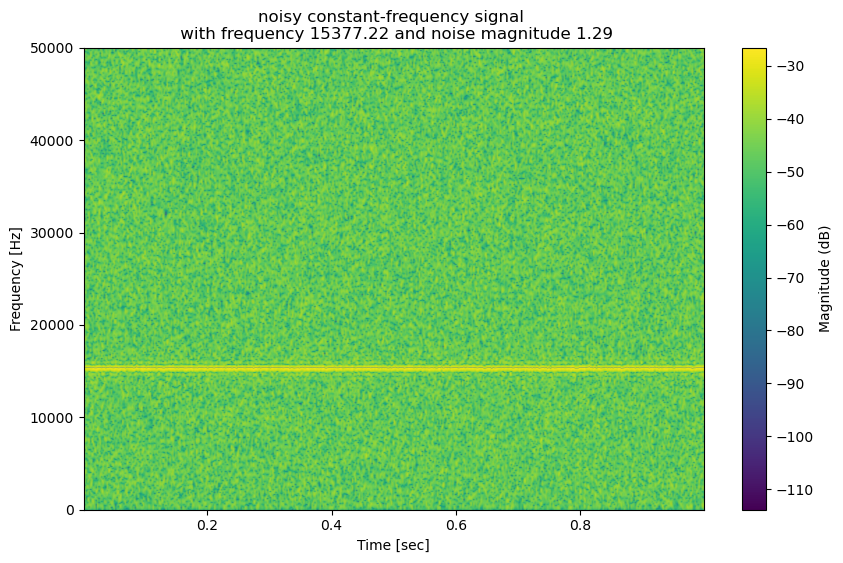

In [6]:
dataset_const = DatasetConst(duration, 
                             sampling_frequency, 
                             num_samples=10, 
                             frequency_lo=10_000, 
                             frequency_hi=20_000, 
                             noise_std_lo=1, 
                             noise_std_hi=5)

signal, frequency, noise_std = dataset_const[0]
title = f"noisy constant-frequency signal \n with frequency {frequency:.2f} and noise magnitude {noise_std:.2f}"
plot_spectrogram(signal, sampling_frequency, down_sampling=10, title=title)

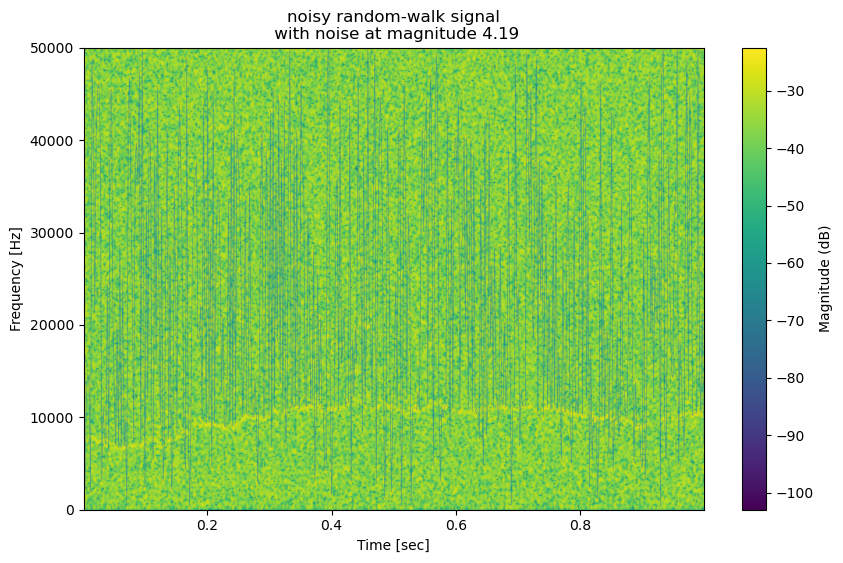

In [7]:
dataset_random_walk = DatasetRandomWalk(duration,
                                        sampling_frequency,
                                        num_samples=10,
                                        random_walk_steps=5000,
                                        random_walk_mag=50,
                                        frequency_base=10_000,
                                        noise_std_lo=1,
                                        noise_std_hi=5)  

signal, random_walk_frequencies, noise_std = dataset_random_walk[0]
title = f"noisy random-walk signal\n with noise at magnitude {noise_std:.2f}"
plot_spectrogram(signal, sampling_frequency, down_sampling=10, title=title)